# Comparando modelos com scikit-learn utilizando o dataset câncer de mama
![Machine learning](imagens/mammogram.png)

## Relembrando o precesso ...
![Machine learning](imagens/DataAnalise.png)

# Os 4 passos para aprender com os dados
![Machine learning](imagens/raiz3.png)

## Dataset Câncer de Mama:
* 569 instâncias, no qual cada instância representa um tecido mamário;
* 30 atributos, que são representadas pelas colunas 2 até a coluna 32;
* As classes das instâncias correspondem se o tumor é maligno ou benigno, representadas pela segunda coluna, a coluna diagnosis;
* Trata-se de um problema de classificação.

# Procedimento de avaliação #1: Treino e teste sobre o dataset inteiro


In [4]:
# Abrindo nosso dataset utilizando o pandas
import pandas as pd
cancer = pd.read_csv('breast-cancer-wisconsin-data/data.csv',
                     index_col=0)

In [5]:
# Criando um dicionário, no qual a letra M corresponde ao número 0 e
# o a letra B corresponde ao número 1
diag = {'M':0, 'B':1}

In [6]:
# Substituindo as letras M pelo número 0 e as letras B pelo número 1
# na coluna diagnosis
cancer.diagnosis = [diag[item] for item in cancer.diagnosis]

In [7]:
# Separando a matriz de atributos
X = cancer.as_matrix(cancer.columns[1:31])

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
# Separando o vetor de classes
y = cancer.as_matrix(['diagnosis'])

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### Logistic regression

In [9]:
#Importando a classe 
from sklearn.linear_model import LogisticRegression

In [10]:
#Instanciamos o modelo
logreg = LogisticRegression()

In [17]:
#Ajustando o modelo
logreg.fit(X,y)

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Predizendo as classes das instâncias
logreg.predict(X)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [14]:
#Armazenando as predições em y_pred
y_pred = logreg.predict(X)

In [15]:
y_pred.shape

(569,)

Acurácia de classificação:

- **Proporção** de predições corretas
- Métrica de avalição muito comum para **problemas de classificação**  

In [16]:
#Calculando a acurácia de classificação do LogisticRegression
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9595782073813708


- Conhecida como **Acurácia de treinamento**, quando você treina e testa seu modelo sobre o mesmo conjunto de dados

### KNN (K=5)

In [17]:
#Calculando a acurácia de classificação do KNN (K=5)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9472759226713533


c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### KNN (K=1)

In [18]:
#Calculando a acurácia de classificação do KNN (K=1)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Problemas em treinar e testar seu modelo sobre o mesmo conjunto de dados

- O objetivo é estimar quão bem o modelo está perfomando quando recebe novos dados
- Porém, maximizar a acurácia de treinamento recompensa modelos muito complexos, que não necessáriamente generalizam
- Modelos desnecessariamente complexos se ajustam demais aos dados do treino 

# Overfitting
![Machine learning](imagens/overfitting.png)

*Image Credit: [Overfitting](http://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons.*

# Procedimento de avaliação #2: Train/Test split
1. Nós iremos dividir o conjunto de dados em duas partes que iremos chamar de conjunto de treinamento e conjunto de teste;
2. Treinamos o modelo utilizando o conjunto de treinamento;
3. Testamos o modelo utilizando o conjunto de teste para avalia-lo.


In [19]:
#Relembrando o formato de X e y
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [23]:
# Dividindo X e y em conjunto de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=4)

![Machine learning](imagens/split.png)

In [24]:
# Conferindo os formatos de X
print(X_train.shape)
print(X_test.shape)

(341, 30)
(228, 30)


In [26]:
0.4*569

227.60000000000002

In [27]:
#Conferindo os formatos de y
print(y_train.shape)
print(y_test.shape)

(341, 1)
(228, 1)


In [28]:
341+228

569

In [29]:
#Treinando o modelo com o conjunto de treinamento
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9078947368421053


c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
#Repetindo o processo para knn (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9078947368421053


c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
#Repetindo o processo para knn (k=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9035087719298246


c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Como achar o melhor valor para K?

In [33]:
#Testando K=1 até K=25 e armazenando a acurácia do conjunto de teste
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

In [34]:
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [35]:
print(scores)

[0.9035087719298246, 0.8728070175438597, 0.9166666666666666, 0.9035087719298246, 0.9078947368421053, 0.9122807017543859, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9122807017543859, 0.9122807017543859, 0.9078947368421053, 0.9122807017543859, 0.9078947368421053, 0.9122807017543859, 0.9078947368421053, 0.9078947368421053, 0.8991228070175439, 0.8991228070175439, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632]


In [36]:
len(scores)

25

Text(0, 0.5, 'Acurácia de teste')

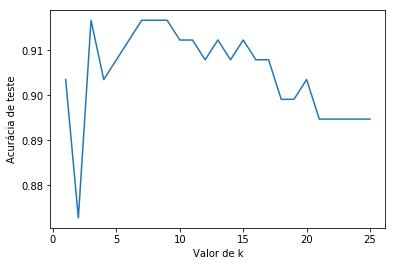

In [38]:
#Criando o gráfico da relação da acurácia e do número de vizinhos(K)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel("Valor de k")
plt.ylabel("Acurácia de teste")

- **Acurácia de treino** aumenta conforme a complexidade do modelo aumenta
- **Acurácia de teste** penaliza modelos que são muito complexos ou não complexos o suficiente
- Para o modelo KNN, a complexidade do modelo é determinada pelo **valor de K** (Valores baixos = maior complexidade)

## Fazendo predições em novas amostras 

In [43]:
#Criando uma nova instância com 30 atributos
X_new = [2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1]
len(X_new)

30

In [44]:
#Fazendo uma predição com o modelo escolhido
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X,y)
knn.predict([X_new])

c:\users\vinicius\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1], dtype=int64)

## Desvantagens do train/test split?

- Fornece uma **alta variância** para novas amostras
- **K-fold cross-validation** supera essa limitação
- Porém, train/test split ainda é bastante útil devido a sua **velocidade e felixibilidade**

## Comentários ou Dúvidas?

- Email: <suporte@viniciusgalvaoia.com.br>
- Website: http://viniciusgalvaoia.com.br

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()